<a href="https://colab.research.google.com/github/ajit04022000/Netflix-mobiles-and-Tv-show/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show
* TV SHOW
* Movie

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

##<B>IMPORTING REQUIRED LIBRABARY:

In [603]:
#Importing the libraries
import pandas as pd
import numpy as np
import pylab as pl
import spacy
import sklearn
import en_core_web_sm

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

#stop-words
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler


# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Do

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##<B>MOUNTING GOOGLE DRIVE:

In [604]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##<B>READING DATASET:

In [605]:
imdb_data = pd.read_csv('/content/drive/MyDrive/ALMABATTER/Netflix Movies And TV shows Clustering- Ajit Kumar Patel/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [606]:
data = imdb_data.copy()

##<B>CHECKING DATASET HEAD

In [607]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


##<B>CHECKING DATSET FROM BOTTOM:

In [608]:
data.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


##<B>CHECKING DATASET SHAPE AND SIZE:

In [609]:
# printing the shape of data shape
print('the no of row present in the data frame =    ',data.shape[0])
print("*"*60)
print('the no of column present in the data frame = ',data.shape[1])
print("*"*60)
print('the no of data present in the data frame =   ',data.size)
print("*"*60)
#Display column names
print(f'Our dataset has following columns -\n {list(data.columns)}')

the no of row present in the data frame =     7787
************************************************************
the no of column present in the data frame =  12
************************************************************
the no of data present in the data frame =    93444
************************************************************
Our dataset has following columns -
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


##<B>CHECKING THE INFORMATION OF DATASET:

In [610]:
# Gathering hte information of our data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


##<B>CHECKING UNIQUE VALUE FOR DATASET's COLUMNS WISE:

In [611]:
# #How many uinque items are present in our data set in each columns:
for i in data:
  a = data[i].nunique()   
  if a:
    print(i, 'has' , a ,'unique value')
    print("*"*50)
  else :
    print(i, 'has' ,a, 'unique values and those are\n',data[i].value_counts())
    print("*"*50)
# data.nunique()

show_id has 7787 unique value
**************************************************
type has 2 unique value
**************************************************
title has 7787 unique value
**************************************************
director has 4049 unique value
**************************************************
cast has 6831 unique value
**************************************************
country has 681 unique value
**************************************************
date_added has 1565 unique value
**************************************************
release_year has 73 unique value
**************************************************
rating has 14 unique value
**************************************************
duration has 216 unique value
**************************************************
listed_in has 492 unique value
**************************************************
description has 7769 unique value
**************************************************


In [612]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [613]:
data['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [614]:
data['director'].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64

In [615]:
data['cast'].value_counts()

David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart                                                                                                                                                                     6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                                         6
                                                                                                                   

In [616]:
data['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [617]:
data['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [618]:
data['duration'].value_counts()

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
233 min         1
196 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

In [619]:
data['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

##<B>CHECKING DATA DESCRIPTION:

In [620]:
# transposing the description of our all data for better understanding
data.describe(include='object').T

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


##<b>CHECKING NULL VALUES:

In [621]:
null = data.isna().sum().sort_values(ascending=False)
null

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

In [622]:
for i in data :
  if data[i].isna().sum()!=0:
    print(i,"is having ",data[i].isna().sum(),"null values","which is",round(100*(data[i].isnull().sum()/len(data)), 2),"%")

director is having  2389 null values which is 30.68 %
cast is having  718 null values which is 9.22 %
country is having  507 null values which is 6.51 %
date_added is having  10 null values which is 0.13 %
rating is having  7 null values which is 0.09 %


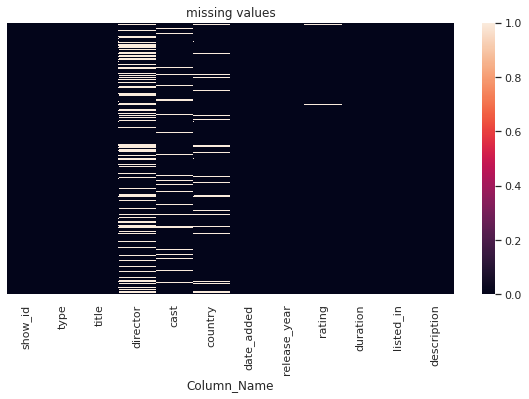

In [623]:
# ploting a heat map to know the null value
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), yticklabels=False)
plt.xlabel("Column_Name")
plt.title("missing values")
plt.show()

##<B>CHECKING THE DUPLICATE DATA POINTS IN DATASET:

In [624]:
# Checking Duplicate Values
value=len(data[data.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


<b>The data set contain contain 
* row = 7787
* column = 12
* Total data size = 93444
* except Release_year (int), all are contain object type data.

---



---
Datainspection:
* director is having  2389 null values which is 30.68 %
* cast is having  718 null values which is 9.22 %
* country is having  507 null values which is 6.51 %
* date_added is having  10 null values which is 0.13 %
* rating is having  7 null values which is 0.09 %

---



---
* date_added conatin catagorical data we ned to convert that into datetime data
* rating columns containg 15 unique value.





##<B>NULL VALUE TREATMENT

* RATING & COUNTRY - As rating column has 0.09% null values , so replacing nulls with mose frequent rating and doing same thing with country column

* CAST - cast column has too many different values and more than 9.22% are missing, so there is no need to keep it but we are keeping it to perform EDA

* DATE - there are few missing values for date column. so, lets so replacing nulls with mose frequent rating and doing same thing with country column

* DIRECTOR - Director column has more then 30% null values so replace null value with mode of that

In [625]:
data['rating'].fillna(data['rating'].mode()[0],inplace = True)
data['country'].fillna(data['country'].mode()[0],inplace = True)
data['cast'].replace(np.nan, 'missing info',inplace  = True)
data['director'].fillna(data['director'].mode()[0],inplace = True)
data['date_added'].fillna(data['date_added'].mode()[0],inplace = True)

In [626]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


##<b>DATE_ADDED COLUMNS SEPARATED INDIVIDUALLY:

In [627]:
data["date_added"] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month
data['day_added'] = data['date_added'].dt.day
data['year_added'].astype(int);
data['day_added'].astype(int);

In [628]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1


##<b>1)ANALYZE THE TYPE OF CONTENT AVAILABLE ON NETFLIX DATASET:

* Analysis entire Netflix dataset consisting of both movies and shows. Let’s compare the total number of movies and shows in this dataset to know which one is the majority.
* Which will tell us about what the audience prefers to watch. So Netflix can decide what type of content they should publish to make the audience happy.

In [629]:
data['type'].value_counts().to_frame()

,type
Movie,5377
TV Show,2410


In [630]:
netflix_movies = data[data["type"]=="Movie"]
netflix_shows = data[data["type"]=="TV Show"]

In [631]:
import plotly.express as px

In [632]:
content = data['type'].value_counts().reset_index()
content = content[content['type'] /  content['type'].sum() > 0.01]

fig = px.pie(content, values='type', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

In [633]:
m_s_groups = data.groupby(["title", "type", "country",]).apply(lambda df: df.date_added) #Returns Pandas Series with movie / series title and original index
m_s_groups.head(40)

title                                                   type     country                        
#Alive                                                  Movie    South Korea                  27   2020-09-08
#AnneFrank - Parallel Stories                           Movie    Italy                        28   2020-07-01
#FriendButMarried                                       Movie    Indonesia                    31   2020-05-21
#FriendButMarried 2                                     Movie    Indonesia                    32   2020-06-28
#Roxy                                                   Movie    Canada                       34   2019-04-10
#Rucker50                                               Movie    United States                35   2016-12-01
#Selfie                                                 Movie    Romania                      36   2019-06-01
#Selfie 69                                              Movie    Romania                      37   2019-06-01
#blackAF               

###<B>Observations :-

* It is evident that there are more movies on Netflix than TV shows.
* Netflix has 5377 movies, which is more than double the quantity of TV shows.
* There are about 70% movies and 30% TV shows on Netflix.
*Because the quantity of movies outnumbers the number of TV series. It appears that movies are most widely available in various countries.

##<b>country wise ananlysis:

In [634]:
data['country'].value_counts().head(10).to_frame().T

,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey
country,3062,923,397,226,183,177,134,115,101,100


In [635]:
from wordcloud import WordCloud

In [636]:
# import plotly.express as px
country = data['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

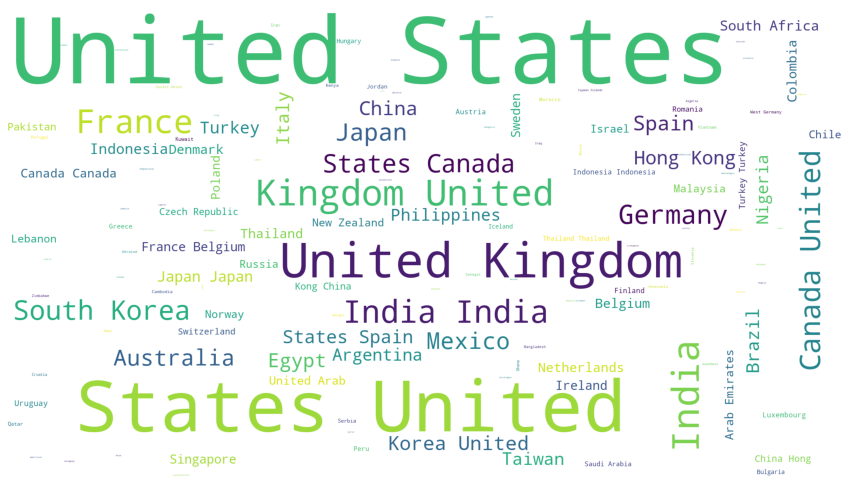

In [637]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(data.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##<b>Total Releases for Last 10 Years:

In [638]:
data['year_added'].value_counts().head(10).to_frame().T

,2019,2020,2018,2017,2016,2021,2015,2014,2011,2013
year_added,2153,2019,1685,1225,443,117,88,25,13,11


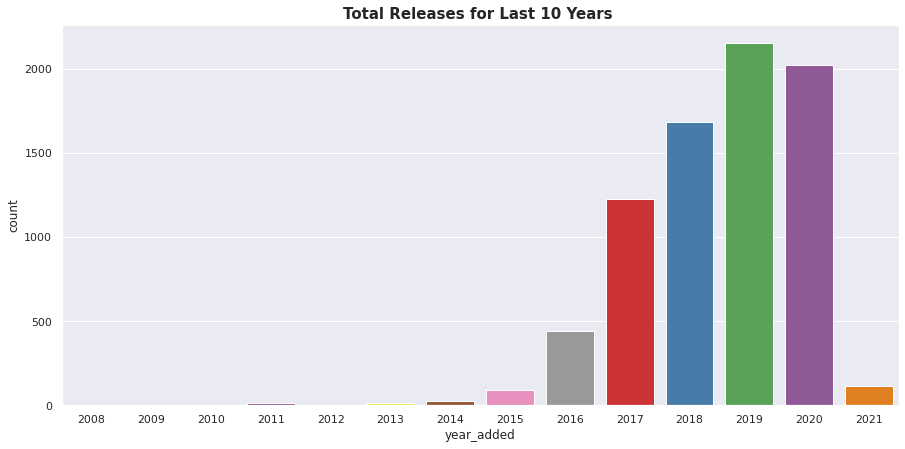

In [639]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=data,palette="Set1")
plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

###<b>observation:
* The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid 19

##<b>Release of movies month-wise:

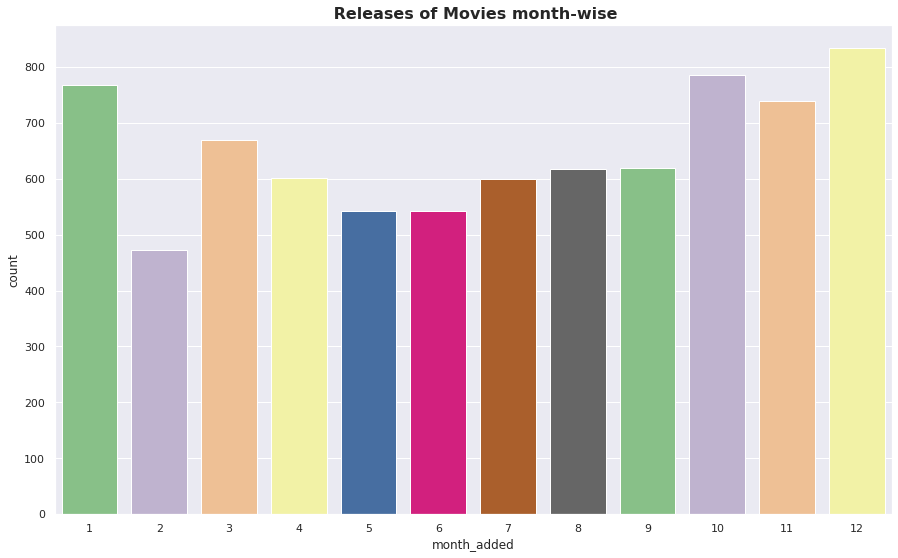

In [640]:
# Release of movies month-wise
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=data,palette="Accent")

plt.title(' Releases of Movies month-wise',size='16',fontweight="bold")    
plt.show()

###<b>observation:
* More of the content is released in holiday season - October, November, December and January

##<b>Relation between type and rating count

In [641]:
booking_per_year = data.groupby('type')['rating'].value_counts().sort_index().unstack()
booking_per_year

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,
Movie,39.0,3.0,79.0,247.0,386.0,663.0,1272.0,111.0,1850.0,505.0,117.0,95.0,5.0,5.0
TV Show,NaN,NaN,5.0,NaN,NaN,2.0,659.0,83.0,1020.0,301.0,163.0,176.0,1.0,NaN


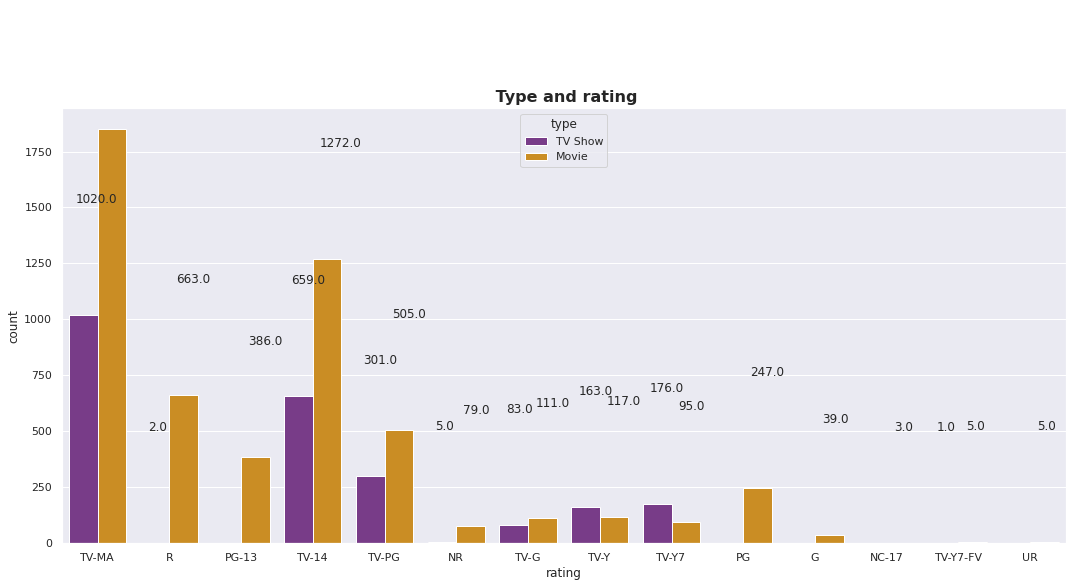

In [642]:
# type wise rating count
plt.figure(figsize=(18,8))
ax = sns.countplot(x='rating',hue='type',data=data,palette="CMRmap")
plt.title(' Type and rating',size='16',fontweight="bold")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.1, p.get_height()+500))

##<b>Distribution of Rating and finding what audience prefer to watch.
* To know which type of content is most watched by the audience so that Netflix can decide what type of content to be released next. It helps Netflix to understand the most and least favourite content watched by an audience.

In [643]:
data['rating'].value_counts().head(10).to_frame().T

,TV-MA,TV-14,TV-PG,R,PG-13,TV-Y,TV-Y7,PG,TV-G,NR
rating,2870,1931,806,665,386,280,271,247,194,84


In [644]:
df_rating = pd.DataFrame(data['rating'].value_counts()).reset_index().rename(columns={'index':'rating','rating':'count'})
fig_bar = px.bar(df_rating, y='rating', x='count', title='Distribution of Rating',
color_discrete_sequence=['#b20710'], text='count')
fig_bar.update_xaxes(showgrid=False)
fig_bar.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig_bar.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_bar.update_layout(margin=dict(t=80, b=0, l=70, r=40),
hovermode="y unified",
xaxis_title=' ', yaxis_title=" ", height=400,
plot_bgcolor='#333', paper_bgcolor='#333',
title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
font=dict(color='#8a8d93'),
legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))

In [645]:
# import plotly.express as px
rating = data['rating'].value_counts().reset_index()
rating = rating[rating['rating'] /  rating['rating'].sum() > 0.01]

fig = px.pie(rating, values='rating', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

###<B>OBSERVATION:
* The audience prefers TV-MA and TV-14 shows more and the least preferred rating shows are Nc-17. Most of the content watched by the audience is for a mature audience. The TV-MA rating is a type of rating given by the TV parental guidelines to a television program.
* The second largest type of rating watched by the audience is TV-14 which is inappropriate for children younger than age 14. The conclusion is drawn here is most of the audience is of mature age.

##<b>ANALYSIS ON RELEASE YEAR OF MOVIES:

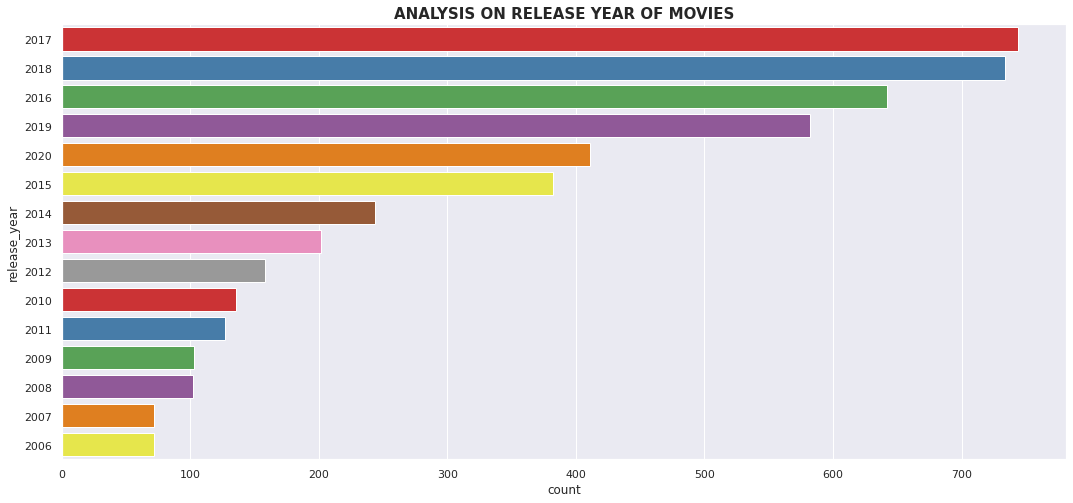

In [646]:
#Year wise analysis
plt.figure(figsize=(18,8))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set1", order=netflix_movies['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

##<b>ANALYSIS ON RELEASE YEAR OF TV Show:

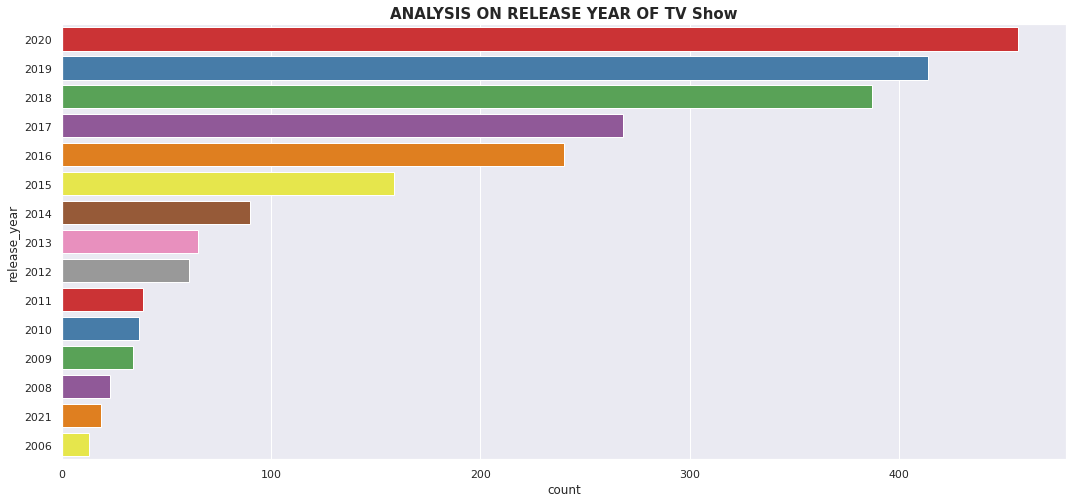

In [647]:
#ANALYSIS ON RELEASE YEAR OF TV Show
plt.figure(figsize=(18,8))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_shows, palette="Set1", order=netflix_shows['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

##<b>3] Is Netflix has increasingly focusing on TV rather than movies in recent years.
1. What is the impact of Netflix TV Shows or Movies over the years by comparing both

In [648]:
import plotly.graph_objects as go

In [649]:
# d1 = data[data["type"] == "TV Show"]
# d2 = data[data["type"] == "Movie"]
# col = "year_added"
# vc1 = d1[col].value_counts().reset_index().rename(columns = {col : "count", "index" : col})
# vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
# vc1 = vc1.sort_values(col)
# vc2 = d2[col].value_counts().reset_index().rename(columns = {col : "count", "index" : col})
# vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
# vc2 = vc2.sort_values(col)
# trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="orange"), )
# trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#b20710"))
# data = [trace1, trace2]
# fig_line = go.Figure(data)
# fig_line.update_traces(hovertemplate=None)
# fig_line.update_xaxes(showgrid=False)
# fig_line.update_yaxes(showgrid=False)
# large_title_format = 'Tv Show and Movies impact over the Year'
# small_title_format = "Due to Covid updatation of content is slowed." 
# fig_line.update_layout(title=large_title_format + " " + small_title_format, 
#     height=400, margin=dict(t=130, b=0, l=70, r=40), 
#     hovermode="x unified", xaxis_title=' ', 
#     yaxis_title=" ", plot_bgcolor='#333', paper_bgcolor='#333', 
#     title_font=dict(size=20, color='#8a8d93',
#     family="Lato, sans-serif"),
#     font=dict(color='#8a8d93'),
#     legend=dict(orientation="h",
#     yanchor="bottom",
#     y=1.10,
#     xanchor="left",
#     x=0.8)) 
# fig_line.add_annotation(dict
#     (x=0.7, 
#     y=0.3,
#     ax=0, 
#     ay=0,
#     xref = "paper",
#     yref = "paper",
#     text= "Highest no.of Tv Shows were released in 2019 followed by 2017" )) 
# fig_line.add_annotation(dict
#     (x=0.7, 
#     y=1,
#     ax=0,
#     ay=0,
#     xref = "paper",
#     yref = "paper",
#     text= "Highest no.of Movies were relased in 2019 followed by 2020" )) 
# fig_line.show()

##<B>OBSERVATION:
* After the year 2019 covid came that badly affects Netflix for producing content. Movies have exponential growth from the start but due to covid, it is going downwards.

##<b>TOP GENRES ON NETFLIX:

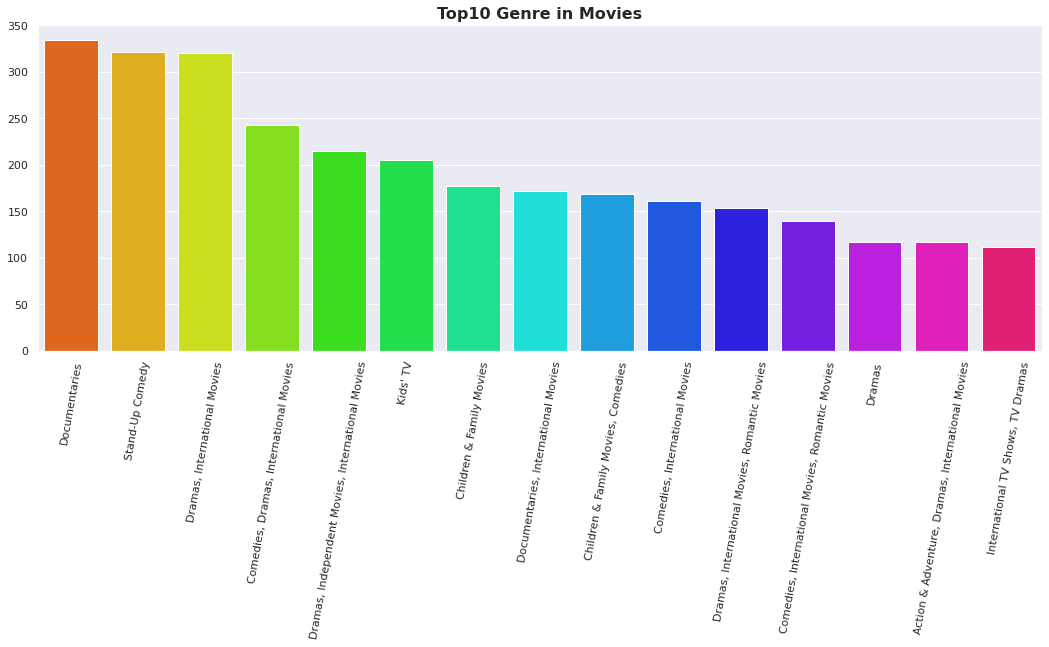

In [650]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = data["listed_in"].value_counts().head(15).index,
            y = data["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

###<b>Observation:
* From the graph, we know that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies..

##<b>TOP 10 GENRES IN NETFLIX (MOVIES):

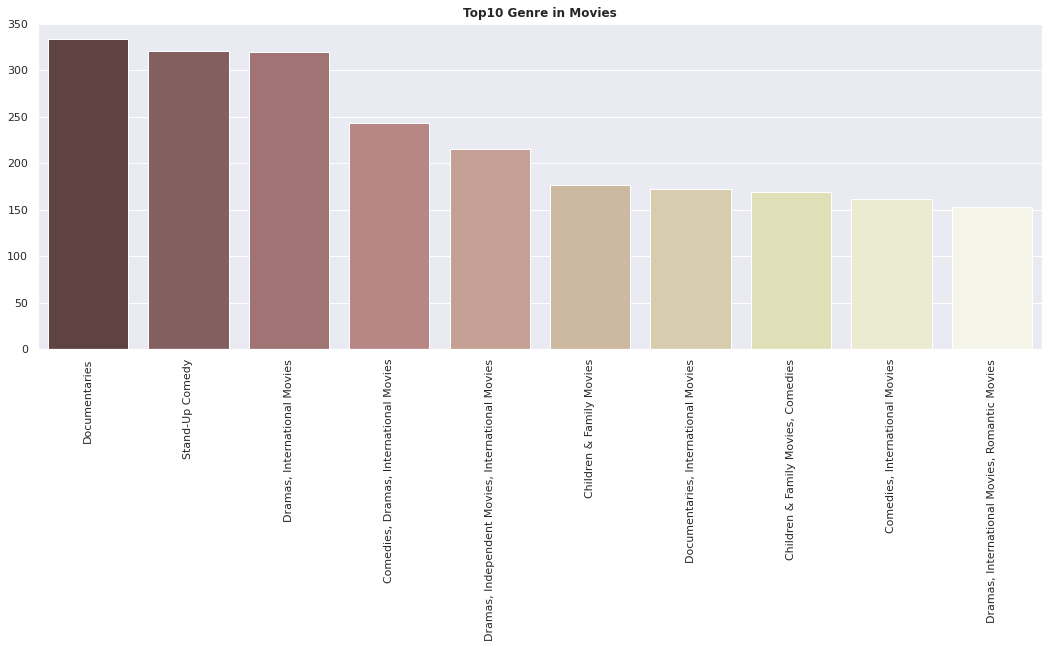

In [651]:
#Top10 Genre in Movies
plt.figure(figsize=(18,6))
sns.barplot(x = netflix_movies["listed_in"].value_counts().head(10).index,
            y = netflix_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=90)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

##<B>TOP 10 GENERES IN NETFLIX (TVSHOW):

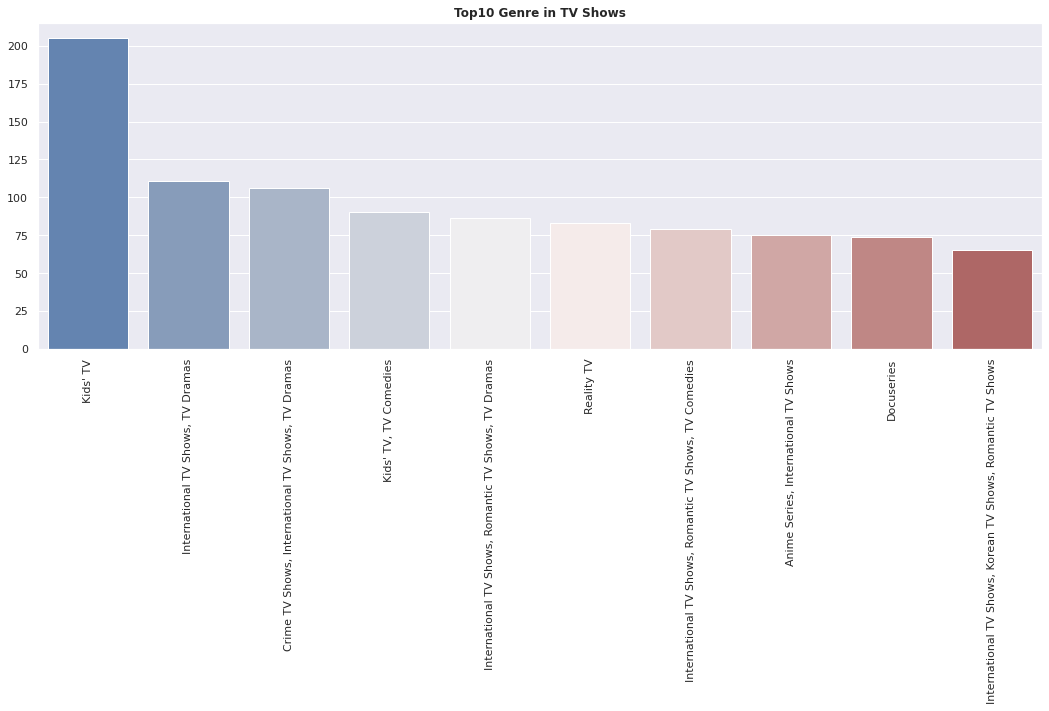

In [652]:
#Top10 Genre in TV Shows
plt.figure(figsize=(18,6))
sns.barplot(x = netflix_shows["listed_in"].value_counts().head(10).index,
            y = netflix_shows["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=90)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

In [653]:
#showing top 5 rows data
netflix_movies["duration"].head()

1     93 min
2     78 min
3     80 min
4    123 min
6     95 min
Name: duration, dtype: object

In [ ]:
data['duration']=data['duration'].str.replace('Season','')
data['duration']=data['duration'].str.replace('s','')
data['duration']=data['duration'].str.replace('min','')

data['duration']=data['duration'].astype(str).astype(int)
# data['duration']

In [676]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,cast_name
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,"[João Miguel, Bianca Comparato, Michel Gomes..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,"[Demián Bichir, Héctor Bonilla, Oscar Serran..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,"[Tedd Chan, Stella Chung, Henley Hii, Lawre..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,"[Elijah Wood, John C. Reilly, Jennifer Conne..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1,1,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ..."


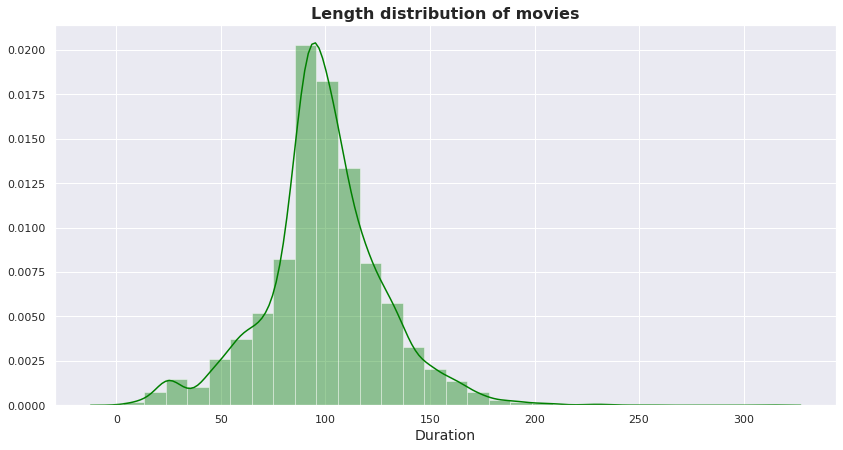

In [656]:
# Length distribution of movies
movie_df = data[data['type']=='Movie']

plt.figure(figsize=(14, 7))
sns.distplot(movie_df['duration'], bins=30,color='green').set(ylabel=None)
plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

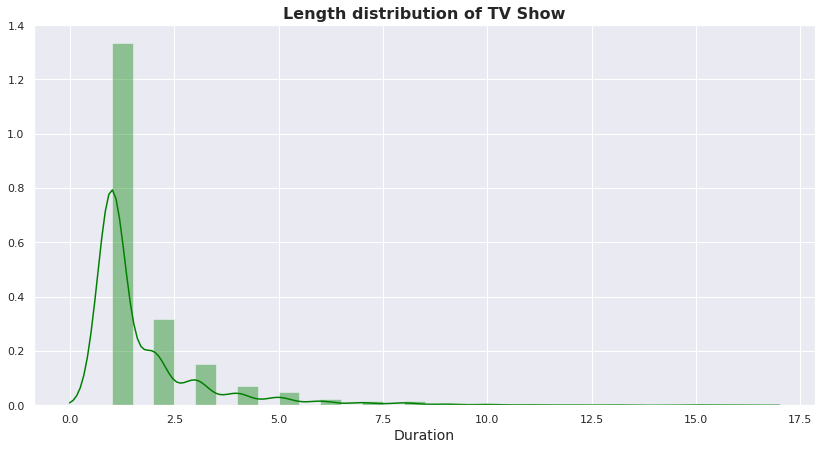

In [679]:
# Length distribution of movies
tv_df = data[data['type']=='TV Show']

plt.figure(figsize=(14, 7))
sns.distplot(tv_df['duration'], bins=30,color='green').set(ylabel=None)
plt.title('Length distribution of TV Show', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

##<b>Top actors of netflix:

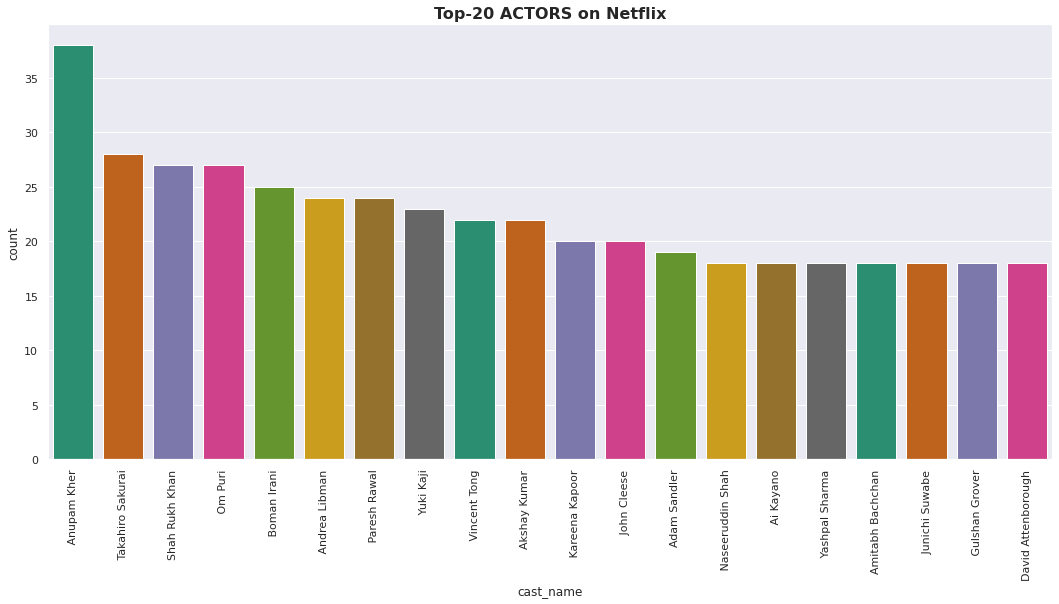

In [657]:
# Top 20 actors netflix
data['cast_name'] = data['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in data['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(18,8))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

###<b>Obesrvation:
* The top actor on Netflix Movies, based on the number of titles, is Anupam Kher

##<b>Top 10 Actor TV Shows Based on The Number of Titles:

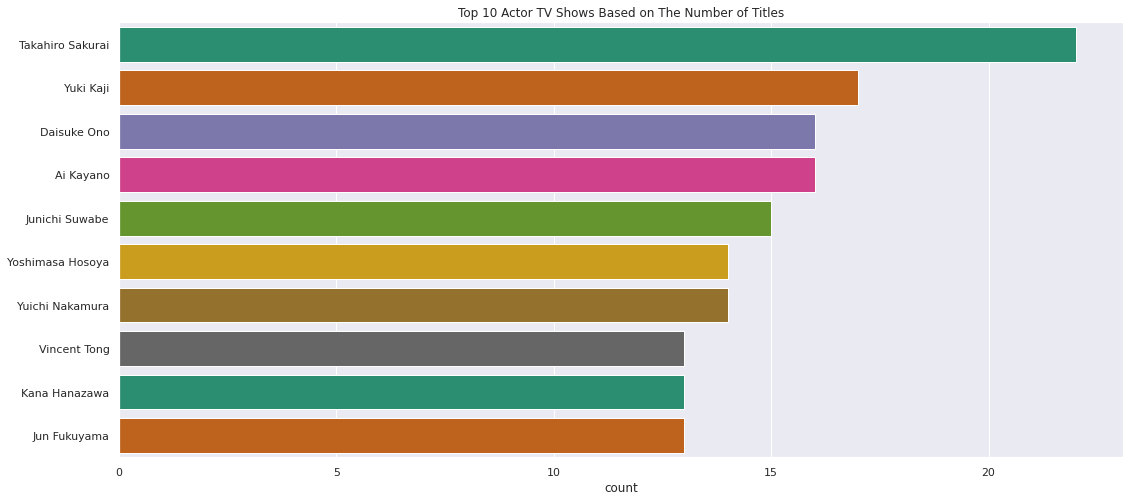

In [658]:
#Top 10 Actor TV Shows Based on The Number of Titles
filtered_cast_shows = netflix_shows[netflix_shows.cast != 'missing info'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(18,8))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette="Dark2")
plt.show()

##<b>Top 10 Actor Movies Based on The Number of Titles

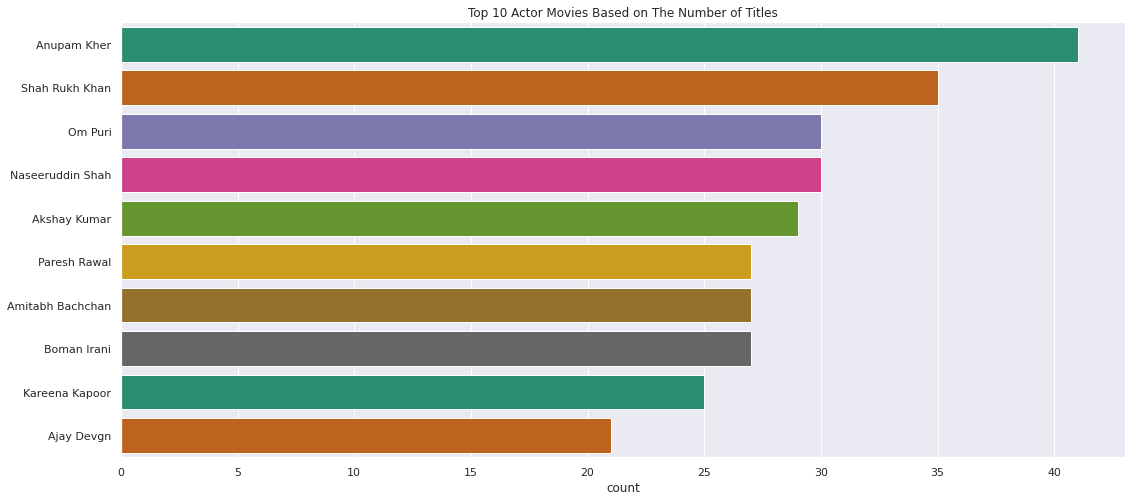

In [659]:
#top 10 Actor Movies Based on The Number of Titles
filtered_cast_movie = netflix_movies[netflix_movies.cast != 'missing info'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(18,8))
plt.title('Top 10 Actor Movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette="Dark2")
plt.show()

##<b>Length distribution of movies

In [660]:
data.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,cast_name
3492,s3493,TV Show,La Familia P. Luche,"Raúl Campos, Jan Suter","Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,2020-01-01,2012,TV-14,3,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",2020,1,1,"[Eugenio Derbez, Consuelo Duval, Luis Manuel..."


##<b>Season-wise distribution of tv shows

In [661]:
# Season-wise distribution of tv shows
shows=netflix_shows['duration'].value_counts().T.reset_index()


fig = px.pie(shows,values='duration',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title="season-wise distribution of tv shows")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color='#7851a9', width=2)))

In [688]:
# Season-wise distribution of tv shows
movies=netflix_movies['duration'].value_counts().T.reset_index()


fig = px.pie(movies,values='duration',names='index',color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(title="season-wise distribution of movies")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color='#7851a9', width=2)))

##<b>LONGEST TV - SHOWS:

In [685]:
long_shows = tv_df[tv_df['duration']>9]
long_shows_df = long_shows[['title','duration']]
tf =long_shows_df.sort_values(by=['duration'],ascending=False)
tf

,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
5137,Red vs. Blue,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
1300,Cheers,11
2263,Frasier,11
2678,Heartland,11


In [686]:
fig = px.pie(tf,values='duration',names='title',color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(title="season-wise distribution of tv shows")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color = 'RebeccaPurple', width=2)))

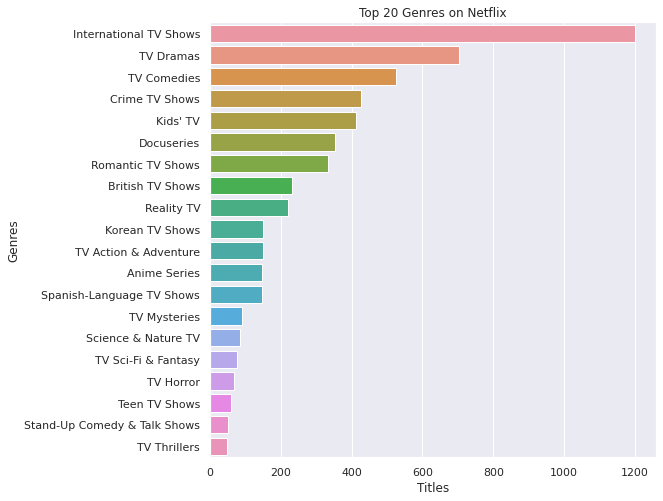

In [674]:
#Top 20 Genres on Netflix
filtered_genres = tv_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(8,8))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

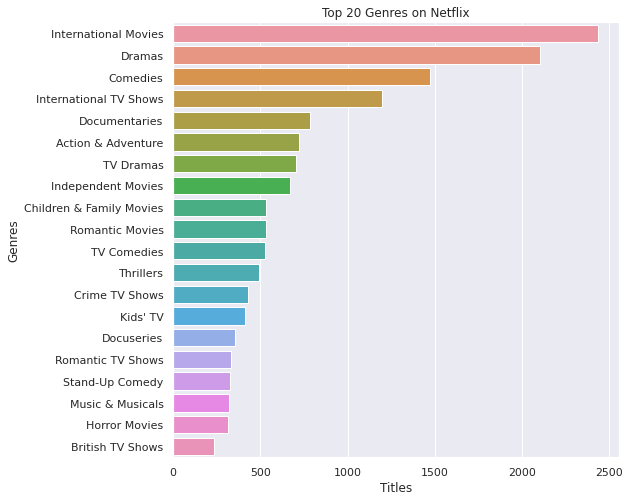

In [673]:
#Top 20 Genres on Netflix
filtered_genres = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(8,8))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

##<b>Popular Diractor:

In [705]:
top_dir = data['director'].value_counts().reset_index()
top_dir = top_dir[top_dir['director'] /  top_dir['director'].sum() > 0.02]
top_dir

,index,director
0,"Raúl Campos, Jan Suter",2407


In [695]:
top_dir = data['director'].value_counts().head(10).to_frame()
top_dir

,director
"Raúl Campos, Jan Suter",2407
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12
Youssef Chahine,12
Martin Scorsese,12
Steven Spielberg,10
David Dhawan,9
Hakan Algül,8


In [696]:
# type wise rating count
plt.figure(figsize=(18,8))
ax = sns.countplot(x=top_dir,hue='type',data=data,palette="CMRmap")
plt.title(' Type and rating',size='16',fontweight="bold")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() +0.1, p.get_height()+500))

ValueError: ignored

<Figure size 1296x576 with 0 Axes>

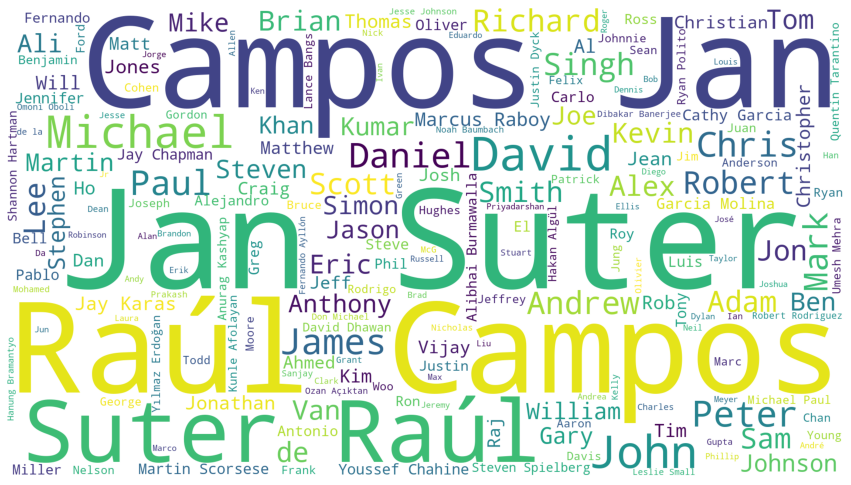

In [668]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(data.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##<B>Categories analysis:

In [669]:
data['listed_in'].value_counts(ascending=False).head(10).to_frame().T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies"
listed_in,334,321,320,243,215,205,177,172,169,161


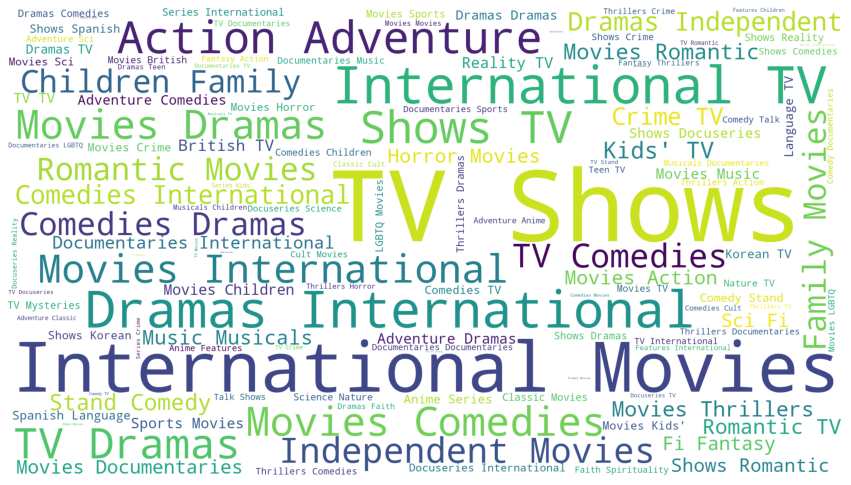

In [670]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(data.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##<b>DATA CLEANING AND PREPROCESSING

In [671]:
movie_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added'],
      dtype='object')

In [707]:
#drop irrelevant column
netflix_movies.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description'],axis=1,inplace=True)

netflix_shows.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description'],axis=1,inplace=True)

new_netflix = data.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description'],axis=1)
netflix_movies

,type,director,country,release_year,rating,duration,listed_in,year_added,month_added,day_added
1,Movie,Jorge Michel Grau,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",2016,12,23
2,Movie,Gilbert Chan,Singapore,2011,R,78 min,"Horror Movies, International Movies",2018,12,20
3,Movie,Shane Acker,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11,16
4,Movie,Robert Luketic,United States,2008,PG-13,123 min,Dramas,2020,1,1
6,Movie,Yasir Al Yasiri,Egypt,2019,TV-MA,95 min,"Horror Movies, International Movies",2020,6,1
...,...,...,...,...,...,...,...,...,...,...
7781,Movie,Peter Hewitt,United States,2006,PG,88 min,"Children & Family Movies, Comedies",2020,1,11
7782,Movie,Josef Fares,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",2020,10,19
7783,Movie,Mozez Singh,India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,3,2
7784,Movie,"Raúl Campos, Jan Suter",United States,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",2020,9,25


###<b>Label encoding:

In [708]:
#Shows top 5 rows
new_netflix.head()

,type,director,country,release_year,rating,duration,listed_in,year_added,month_added,day_added,cast_name
0,TV Show,"Raúl Campos, Jan Suter",Brazil,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,8,14,"[João Miguel, Bianca Comparato, Michel Gomes..."
1,Movie,Jorge Michel Grau,Mexico,2016,TV-MA,93,"Dramas, International Movies",2016,12,23,"[Demián Bichir, Héctor Bonilla, Oscar Serran..."
2,Movie,Gilbert Chan,Singapore,2011,R,78,"Horror Movies, International Movies",2018,12,20,"[Tedd Chan, Stella Chung, Henley Hii, Lawre..."
3,Movie,Shane Acker,United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11,16,"[Elijah Wood, John C. Reilly, Jennifer Conne..."
4,Movie,Robert Luketic,United States,2008,PG-13,123,Dramas,2020,1,1,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ..."
